In [1]:
from matplotlib.pyplot import imread as imread
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def convert_RGB_to_BW(img, threshold = 100):
    res = np.zeros((img.shape[0], img.shape[1]))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            # 3 bileşenlerin ortalaması belirlenen threshold üstünde ise 1 olarak kabul edeceğiz
            if(sum(img[i,j,:])/3 > threshold):
                res[i,j] = 1
            # değil ise 0 olarak kabul edeceğiz
            else:
                res[i,j] = 0
    return res

In [17]:
letters = ['a', 'b', 'c', 'd', 'e']
images = {}
for l in letters:
    images[l] = []  #l harfi icin bos bir liste haziriliyoruz, birazdan sonra icinde 5 tane eleman olacak
    for i in range(1,6): # 1 .. 5
        # ../letters/a1.jpg
        img = convert_RGB_to_BW(imread('../letters/'+l+str(i)+'.jpg'))
        images[l].append(img)

In [31]:
def findCenter(points):
    x = 0
    y = 0
    for p in points:
        x += p[0]
        y += p[1]
    return [x/len(points), y/len(points)]

def getBlackPoints(img):
    return {(i,j)   for i in range(img.shape[0])
            for j in range(img.shape[1]) 
            if img[i,j] == 1
    }


reference = {}
for l in letters:
    center = None
    for img in images[l]:
        black_points = getBlackPoints(img)
        curr_center = findCenter(black_points)
        if center:
            center = findCenter([center,curr_center])
        else:
            center = curr_center
    reference[l] = center

{'a': [90.26706351447206, 125.37545822001425], 'b': [89.41813474880138, 126.25368112276732], 'c': [90.65023460352276, 125.72746912344519], 'd': [89.19399484275147, 124.3893856601364], 'e': [90.94514617102217, 123.96260677552218]}
[89.65589446499617, 126.36395151345944]


{'a': [90.26706351447206, 125.37545822001425], 'b': [89.41813474880138, 126.25368112276732], 'c': [90.65023460352276, 125.72746912344519], 'd': [89.19399484275147, 124.3893856601364], 'e': [90.94514617102217, 123.96260677552218]}
[91.19044057496787, 122.55783569007829]
{'l': 'e', 'dd': [0.24529440394569235, 1.4047710854438833]}


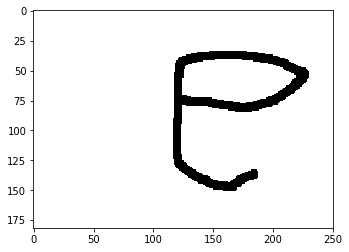

In [62]:

print(reference)
res = {'l':None, 'dd':[1000, 1000]}

bt_img = convert_RGB_to_BW(imread('../letters/bt.jpg'))
found_center = findCenter(getBlackPoints(bt_img))
print(found_center)
for l in reference:
    d_x = abs(found_center[0] - reference[l][0])
    d_y = abs(found_center[1] - reference[l][1])
    if (d_x + d_y) < (sum(res['dd'])) :
        res['l'] = l
        res['dd'] = [d_x, d_y]
print(res)
plt.imshow(bt_img, cmap='gray')
plt.show()